## What is Exploratory Data Analysis?

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in EDA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of EDA, we can ask to define the problem statement or definition on our data set which is very important.

## How to perform Exploratory Data Analysis?

This is one such question that everyone is keen on knowing the answer. Well, the answer is it depends on the data set that you are working. There is no one method or common methods in order to perform EDA, whereas in this tutorial you can understand some common methods and plots that would be used in the EDA process.

## What data are we exploring today?

The dataset I will be using is a football match dataset between Arsenal and Man City. The data-set was scrapped from . To give a piece of brief information about the data set this data contains 199 rows and 9 columns which contains features of the Matches such as Date, League, Home Team, Score, Away Team, Home Score, Away Score  and many more. So in this tutorial, we will explore the data and get some insight from the data.

## Let's get started !!!

### Importing python libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [2]:
# Read Excel file
dataset = pd.read_excel('Soccer_Data_Excel.xlsx')
print("Shape of dataframe is: {}".format(dataset.shape))

Shape of dataframe is: (199, 9)


In [3]:
# Make a copy of the original sourcefile
df_Matches = dataset.copy()

### Data Description and Exploratory Visualisations

In [4]:
# Dataset columns 
df_Matches.columns

Index(['Date_Time', 'League', 'Home_Team', 'Score', 'Away_Team', 'Home_Score',
       'Away_Score', 'Home_Dummy_Score', 'Away_Dummy_Score'],
      dtype='object')

In [5]:
# Dataset header
df_Matches.head()

,Date_Time,League,Home_Team,Score,Away_Team,Home_Score,Away_Score,Home_Dummy_Score,Away_Dummy_Score
0,We 17Jun 2020,Premier League,Man City,3-0,Arsenal,3,0,1,0
1,Su 15Dec 2019,Premier League,Arsenal,0-3,Man City,0,3,0,1
2,Su 03Feb 2019,Premier League,Man City,3-1,Arsenal,3,1,1,0
3,Su 12Aug 2018,Premier League,Arsenal,0-2,Man City,0,2,0,1
4,Th 01Mar 2018,Premier League,Arsenal,0-3,Man City,0,3,0,1


In [6]:
# Dataset footer
df_Matches.tail()

,Date_Time,League,Home_Team,Score,Away_Team,Home_Score,Away_Score,Home_Dummy_Score,Away_Dummy_Score
194,Sa 07Sep 1895,English Div 2 (old),Arsenal,0-1,Man City,0,1,0,1
195,Sa 15Dec 1894,English Div 2 (old),Man City,4-1,Arsenal,4,1,1,0
196,Sa 29Sep 1894,English Div 2 (old),Arsenal,4-2,Man City,4,2,1,0
197,Sa 30Dec 1893,English Div 2 (old),Man City,0-1,Arsenal,0,1,0,1
198,Sa 11Nov 1893,English Div 2 (old),Arsenal,1-0,Man City,1,0,1,0


> The dataset contains several numerical and categorical columns providing various information on the matches played between Arsenal and Man City.

In [7]:
# Columns datatypes and missign values
df_Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
Date_Time           199 non-null object
League              199 non-null object
Home_Team           199 non-null object
Score               199 non-null object
Away_Team           199 non-null object
Home_Score          199 non-null int64
Away_Score          199 non-null int64
Home_Dummy_Score    199 non-null int64
Away_Dummy_Score    199 non-null int64
dtypes: int64(4), object(5)
memory usage: 14.1+ KB


> The data provided has no missing values.

In [8]:
# Check for duplicate rows
duplicate_rows_df = df_Matches[df_Matches.duplicated()]
print('the number of duplicate rows: ', duplicate_rows_df.shape[0])

the number of duplicate rows:  0


> The data provided has no duplicate rows.

### Numerical features overview

In [9]:
df_Matches.describe()

,Home_Score,Away_Score,Home_Dummy_Score,Away_Dummy_Score
count,199.000000,199.00000,199.000000,199.000000
mean,1.618090,1.18593,0.708543,0.517588
std,1.342722,1.18091,0.455580,0.500951
min,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.00000,1.000000,1.000000
75%,2.000000,2.00000,1.000000,1.000000
max,7.000000,5.00000,1.000000,1.000000


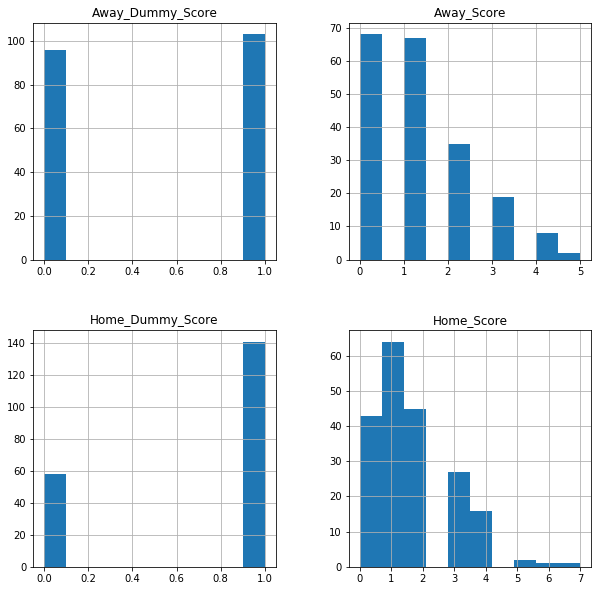

In [10]:
df_Matches.hist(figsize=(10,10))
plt.show()

> A few observations can be made based on the information and histograms for numerical features:
 - From Home Dummy score, we can observed that there is a high rate of win if the game is played at Home.
 - The One goal is common in most Matches played at Home.
 - Zero and One are the common goals scored in Matches played Away

In [11]:
# Types of Leagues played 
df_Matches['League'].value_counts()

English Div 1 (old)    124
Premier League          26
Premiership             20
English Div 2 (old)     14
English League Cup       5
Carling Cup              3
English FA Cup           3
Charity Shield           1
FA Cup                   1
EFL Cup                  1
Community Shield         1
Name: League, dtype: int64

> We have English Div 1 (old), Premier League and Premiership which all means the same thing.

In [12]:
#Replace English Div 1 and Premiership 
df_Matches['League'].replace({"English Div 1 (old)": "Premier League", "Premiership": "Premier League"},
                             inplace=True)

In [13]:
df_Matches['League'].value_counts()

Premier League         170
English Div 2 (old)     14
English League Cup       5
Carling Cup              3
English FA Cup           3
Charity Shield           1
FA Cup                   1
EFL Cup                  1
Community Shield         1
Name: League, dtype: int64

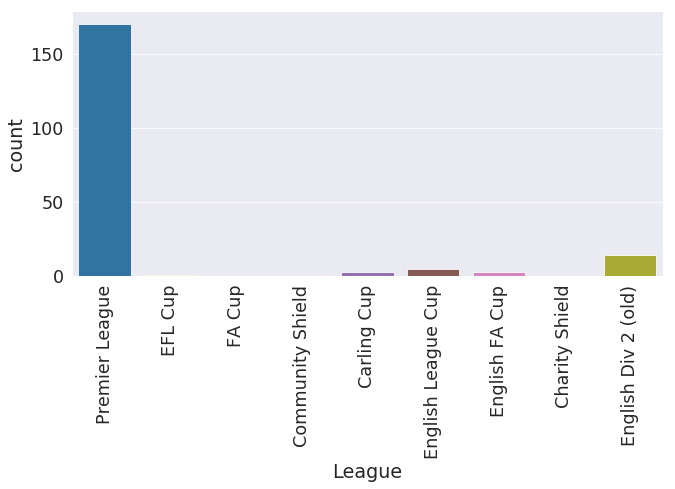

In [14]:
#Histogram plot of the number of leagues played 
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2)
g = sns.catplot(x='League', data=df_Matches, aspect=2.0, kind="count")
g.set_xticklabels(rotation=90)

> We observed that Premier League has the highest number of matches played with 170 matches.

In [15]:
#Replace 1 to Win and 0 to Loss in Home_Dummy_Score and Away_Dummy_Score
df_Matches['Home_Dummy_Score'].replace({1: "Win", 0: "Loss"}, inplace=True)
df_Matches['Away_Dummy_Score'].replace({1: "Win", 0: "Loss"}, inplace=True)

In [16]:
#dataset header
df_Matches.head()

,Date_Time,League,Home_Team,Score,Away_Team,Home_Score,Away_Score,Home_Dummy_Score,Away_Dummy_Score
0,We 17Jun 2020,Premier League,Man City,3-0,Arsenal,3,0,Win,Loss
1,Su 15Dec 2019,Premier League,Arsenal,0-3,Man City,0,3,Loss,Win
2,Su 03Feb 2019,Premier League,Man City,3-1,Arsenal,3,1,Win,Loss
3,Su 12Aug 2018,Premier League,Arsenal,0-2,Man City,0,2,Loss,Win
4,Th 01Mar 2018,Premier League,Arsenal,0-3,Man City,0,3,Loss,Win


In [17]:
#Calculate the number of Home and Away wins of Man City
mancity_home_win = df_Matches.loc[(df_Matches['Home_Team'] == 'Man City') & 
                                     (df_Matches['Home_Dummy_Score'] == "Win")& 
                                     (df_Matches['Away_Dummy_Score'] == "Loss")].shape[0]

mancity_away_win = df_Matches.loc[(df_Matches['Away_Team'] == 'Man City') & 
                                     (df_Matches['Away_Dummy_Score'] == "Win")
                                 & (df_Matches['Home_Dummy_Score'] == "Loss")].shape[0]

print("Man City won the total of {} matches at home and won the total of {} matches away" 
      .format(mancity_home_win, mancity_away_win))

Man City won the total of 37 matches at home and won the total of 20 matches away


In [18]:
#Calculate the number of Home and Away wins of Arsenal
arsenal_home_win= df_Matches.loc[(df_Matches['Home_Team'] == 'Arsenal') & 
                                 (df_Matches['Home_Dummy_Score'] == "Win")& 
                                (df_Matches['Away_Dummy_Score'] == "Loss")].shape[0]

arsenal_away_win= df_Matches.loc[(df_Matches['Away_Team'] == 'Arsenal') & 
                                 (df_Matches['Away_Dummy_Score'] == "Win")& 
                                 (df_Matches['Home_Dummy_Score'] == "Loss")].shape[0]

print("Arsenal won the total of {} matches at Home and won the total of {} matches away" 
      .format(arsenal_home_win, arsenal_away_win))

Arsenal won the total of 59 matches at Home and won the total of 38 matches away


In [19]:
draw = df_Matches.loc[(df_Matches['Away_Dummy_Score'] == "Win")& 
                                                 (df_Matches['Home_Dummy_Score'] == "Win")].shape[0]
print("The number of draw is. {}".format(draw))

The number of draw is. 45


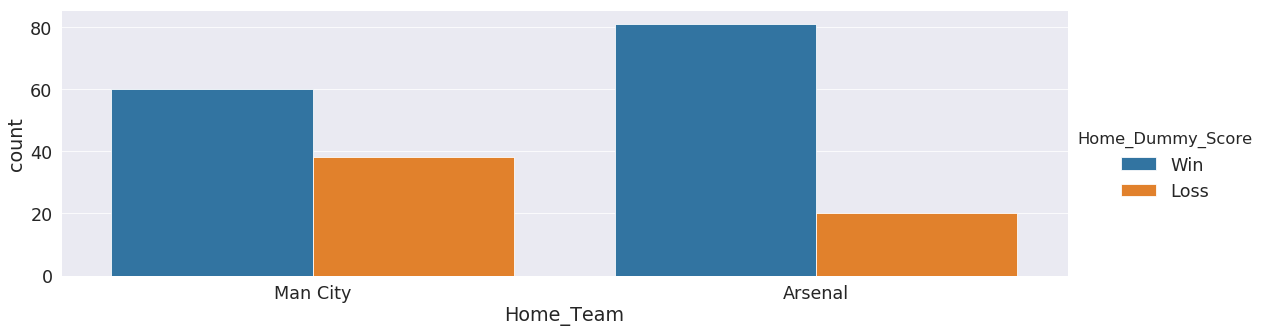

In [20]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2)
g = sns.catplot(x='Home_Team', data=df_Matches, aspect=3.0, kind="count", hue='Home_Dummy_Score')

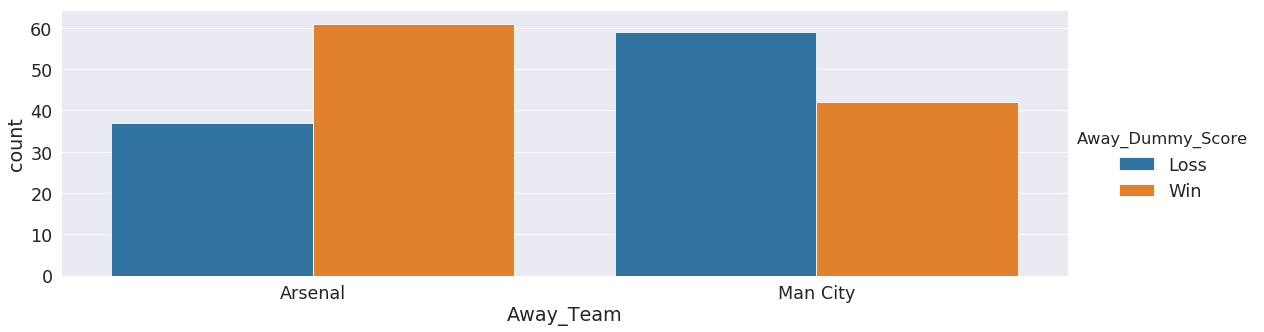

In [21]:
sns.catplot(x='Away_Team', data=df_Matches, aspect=3.0, kind="count", hue='Away_Dummy_Score')

In [22]:
# Total Number of Arsenal Wins
Total_arsenal_wins = arsenal_away_win + arsenal_home_win

# Total Man City wins
Total_mancity_wins = mancity_away_win + mancity_home_win

print("The total Arsenal wins is: {} while the total Man city win is: {}" 
      .format(Total_arsenal_wins, Total_mancity_wins))

The total Arsenal wins is: 97 while the total Man city win is: 57


> A few observation
 - We can see that Arsenal performed better than Man city in all matches played at home. Arsenal won a total of 59 games played at home while Mancity won the total of 37 games played at Home
 - We can observed that Arsenal performed well at Away game. Arsenal had  a total of 38 away games while Man city has a total of 20 away wins.
 - From the total from both Away and Home game, Arsenal perfomed better winning 97 games while Man City won 57 games.
 - They draw 45 of the matches played.

### Top 10 recent matches 

In [23]:
#10 recent matches 
df_Matches.head(10)

,Date_Time,League,Home_Team,Score,Away_Team,Home_Score,Away_Score,Home_Dummy_Score,Away_Dummy_Score
0,We 17Jun 2020,Premier League,Man City,3-0,Arsenal,3,0,Win,Loss
1,Su 15Dec 2019,Premier League,Arsenal,0-3,Man City,0,3,Loss,Win
2,Su 03Feb 2019,Premier League,Man City,3-1,Arsenal,3,1,Win,Loss
3,Su 12Aug 2018,Premier League,Arsenal,0-2,Man City,0,2,Loss,Win
4,Th 01Mar 2018,Premier League,Arsenal,0-3,Man City,0,3,Loss,Win
5,Su 25Feb 2018,EFL Cup,Arsenal,0-3,Man City,0,3,Loss,Win
6,Su 05Nov 2017,Premier League,Man City,3-1,Arsenal,3,1,Win,Loss
7,Su 23Apr 2017,FA Cup,Arsenal,2-1,Man City,2,1,Win,Loss
8,Su 02Apr 2017,Premier League,Arsenal,2-2,Man City,2,2,Win,Win
9,Su 18Dec 2016,Premier League,Man City,2-1,Arsenal,2,1,Win,Loss


In [24]:
#Calculate the number of Home and Away wins of Man City
latest_mancity_home_win = df_Matches.head(10).loc[(df_Matches['Home_Team'] == 'Man City') & 
                                                 (df_Matches['Home_Dummy_Score'] == "Win") & 
                                                 (df_Matches['Away_Dummy_Score'] == "Loss") ].shape[0]

latest_mancity_away_win = df_Matches.head(10).loc[(df_Matches['Away_Team'] == 'Man City') & 
                                                 (df_Matches['Away_Dummy_Score'] == "Win") & 
                                                 (df_Matches['Home_Dummy_Score'] == "Loss")].shape[0]

print("Man City won the total of {} matches at home and won the total of {} matches away" 
      .format(latest_mancity_home_win, latest_mancity_away_win))

Man City won the total of 4 matches at home and won the total of 4 matches away


In [25]:
#Calculate the number of Home and Away wins of Arsenal
latest_arsenal_home_win = df_Matches.head(10).loc[(df_Matches['Home_Team'] == 'Arsenal') & 
                                                  (df_Matches['Home_Dummy_Score'] == "Win")& 
                                                 (df_Matches['Away_Dummy_Score'] == "Loss") ].shape[0]

latest_arsenal_away_win = df_Matches.head(10).loc[(df_Matches['Away_Team'] == 'Arsenal') & 
                                                  (df_Matches['Away_Dummy_Score'] == "Win")& 
                                                 (df_Matches['Home_Dummy_Score'] == "Loss")].shape[0]

print("Arsenal won the total of {} matches at Home and won the total of {} matches away" 
      .format(latest_arsenal_home_win, latest_arsenal_away_win))

Arsenal won the total of 1 matches at Home and won the total of 0 matches away


In [26]:
#the number of draw
latest_draw = df_Matches.head(10).loc[(df_Matches['Away_Dummy_Score'] == "Win")& 
                                                 (df_Matches['Home_Dummy_Score'] == "Win")].shape[0]
print("The number of draw is {}".format(latest_draw))

The number of draw is. 1


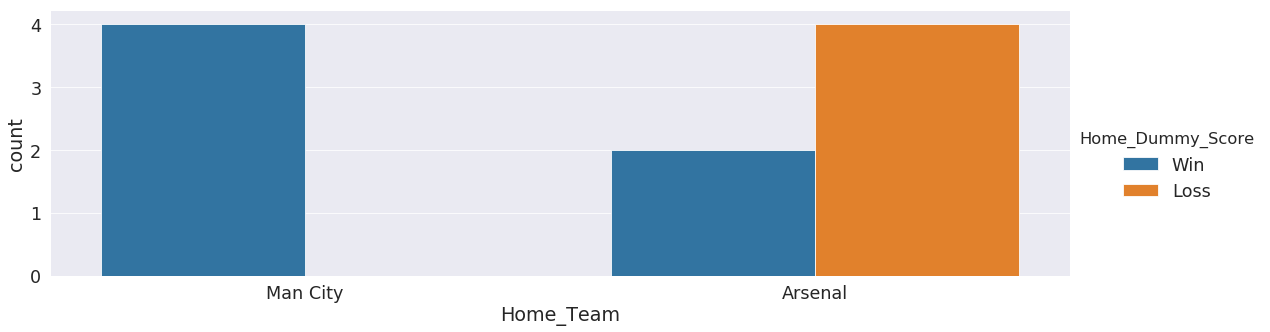

In [27]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2)
g = sns.catplot(x='Home_Team', data=df_Matches.head(10), aspect=3.0, kind="count", hue='Home_Dummy_Score')

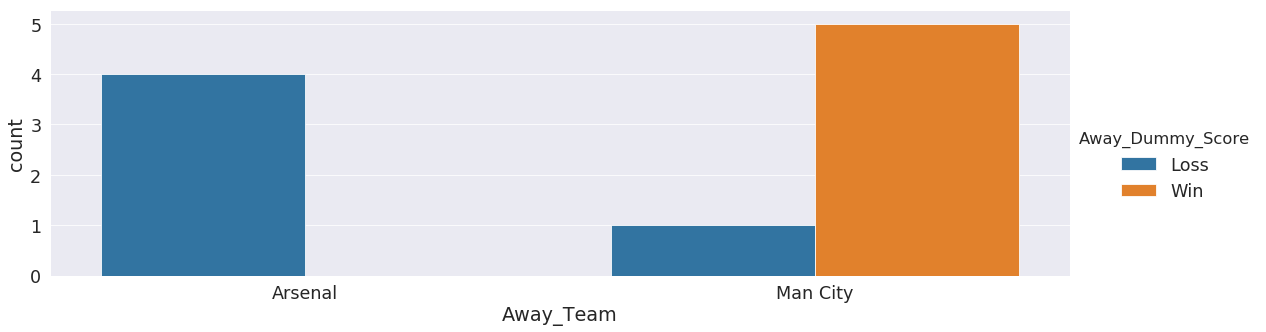

In [28]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=2)
g = sns.catplot(x='Away_Team', data=df_Matches.head(10), aspect=3.0, kind="count", hue='Away_Dummy_Score')

In [29]:
#Total wins 
Total_arsenal_latest_win = latest_arsenal_away_win + latest_arsenal_home_win

Total_mancity_latest_win = latest_mancity_away_win + latest_mancity_home_win

print("The total Arsenal wins is: {} while the total Man city win is: {} while we have {} draw in their last 10 matches" 
      .format(Total_arsenal_latest_win, Total_mancity_latest_win, latest_draw))

The total Arsenal wins is: 1 while the total Man city win is: 8 while we have 1 draw in their last 10 matches


> A few observation
 - We can see that Man City performed better than Arsenal in all matches played at home. Man City won a total of 4 games played at home while Arsenal won the total of 1 games played at Home
 - We can observed that Man City performed well at Away game. Arsenal had  a total of 0 away games while Man city has a total of 4 away wins.
 - From the total from both Away and Home game, Man City perfomed better winning 8 games while Arsenal won 1 games and they draw 1 game in the last 10 matches.